# {Project Title}📝

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below -->

Mental health. It is a topic that, while accepted moreso now, has aspects that are still underlooked. While some people can easily reach out and recognize their own poor mental health, others are too anxious or don't even attempt to reach out. This is very impactful for me personally along with many others I have met.

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->

How prominent is poor mental health?

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->

Very common would be the easiest and shortest answer. 

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->



These datasets will help answer the question of the prominence of mental health.

## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

My approach is simple. The Kaggle datasets provide huge insights on a global and smaller scale. This includes a bunch of different angles too, like in tech, a more global scale, and social media.

In [6]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Configure pandas to display 500 rows; otherwise it will truncate the output
pd.set_option('display.max_rows', 500)

# To plot pretty figures
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.style.use("bmh")

In [27]:
import opendatasets as od
import pandas as pd

# Define the list of datasets
datasets = [
    'https://www.kaggle.com/osmi/mental-health-in-tech-survey',
    'https://www.kaggle.com/datasets/reenapinto/mental-health-care?select=Mental_Health_Care_in_the_Last_4_Weeks.csv',
    'https://www.kaggle.com/datasets/jeevanaduwarahan/student-mental-health'
]

# Download datasets using opendatasets
for dataset_url in datasets:
    od.download(dataset_url, force=True)

# Read datasets into pandas data frames
health_in_tech = pd.read_csv('mental-health-in-tech-survey/survey.csv')
us_mental_health_care = pd.read_csv('mental-health-care/Mental_Health_Care_in_the_Last_4_Weeks.csv')
student_mental_health = pd.read_csv('student-mental-health/Student Mental health.csv')


# Print the first few rows of each data frame
print(health_in_tech.head())


100%|██████████| 48.8k/48.8k [00:00<00:00, 1.10MB/s]

100%|██████████| 166k/166k [00:00<00:00, 1.82MB/s]

100%|██████████| 1.32k/1.32k [00:00<00:00, 1.37MB/s]


             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1

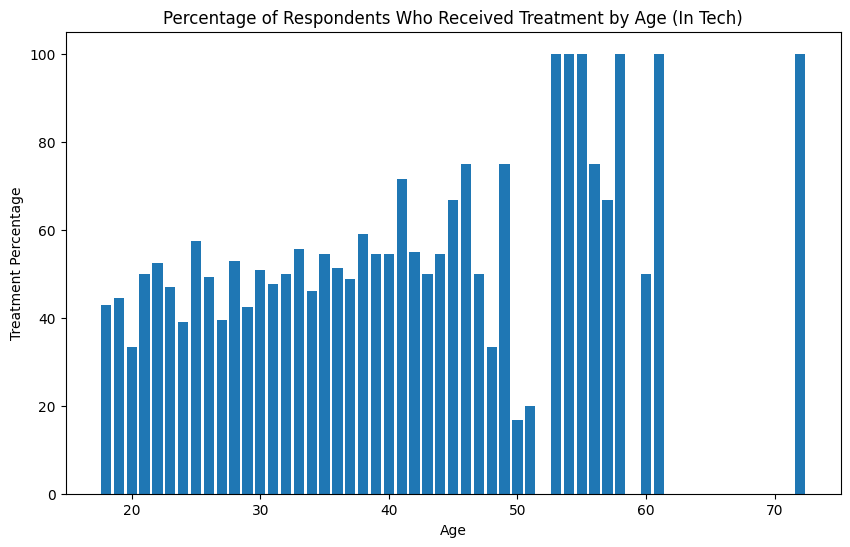

In [50]:
import matplotlib.pyplot as plt

# Filter the data for respondents aged 18 to 72
age_filtered_data = health_in_tech[health_in_tech['Age'].between(18, 72)]

# Group the data by age and calculate the percentage of respondents who received treatment
treatment_by_age = age_filtered_data.groupby('Age')['treatment'].value_counts(normalize=True).unstack().fillna(0)
treatment_by_age = treatment_by_age.loc[:, 'Yes'] * 100  # Select only the 'Yes' column and multiply by 100

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(treatment_by_age.index, treatment_by_age)
plt.xlabel('Age')
plt.ylabel('Treatment Percentage')
plt.title('Percentage of Respondents Who Received Treatment by Age (In Tech)')
plt.show()

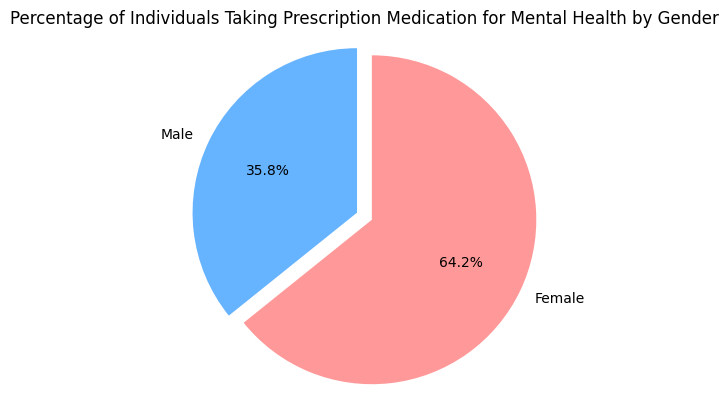

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('mental-health-care/Mental_Health_Care_in_the_Last_4_Weeks.csv')

# Filter the data to include only the necessary columns
gender_df = df[df['Group'] == 'By Sex'][['Subgroup', 'Value']]
male_percentage = gender_df.loc[gender_df['Subgroup'] == 'Male', 'Value'].values[0]
female_percentage = gender_df.loc[gender_df['Subgroup'] == 'Female', 'Value'].values[0]

# Creating a pie chart
labels = ['Male', 'Female']
sizes = [male_percentage, female_percentage]
colors = ['#66b3ff', '#ff9999']
explode = (0.1, 0)  # To emphasize the first slice (Male)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Percentage of Individuals Taking Prescription Medication for Mental Health by Gender')

plt.show()

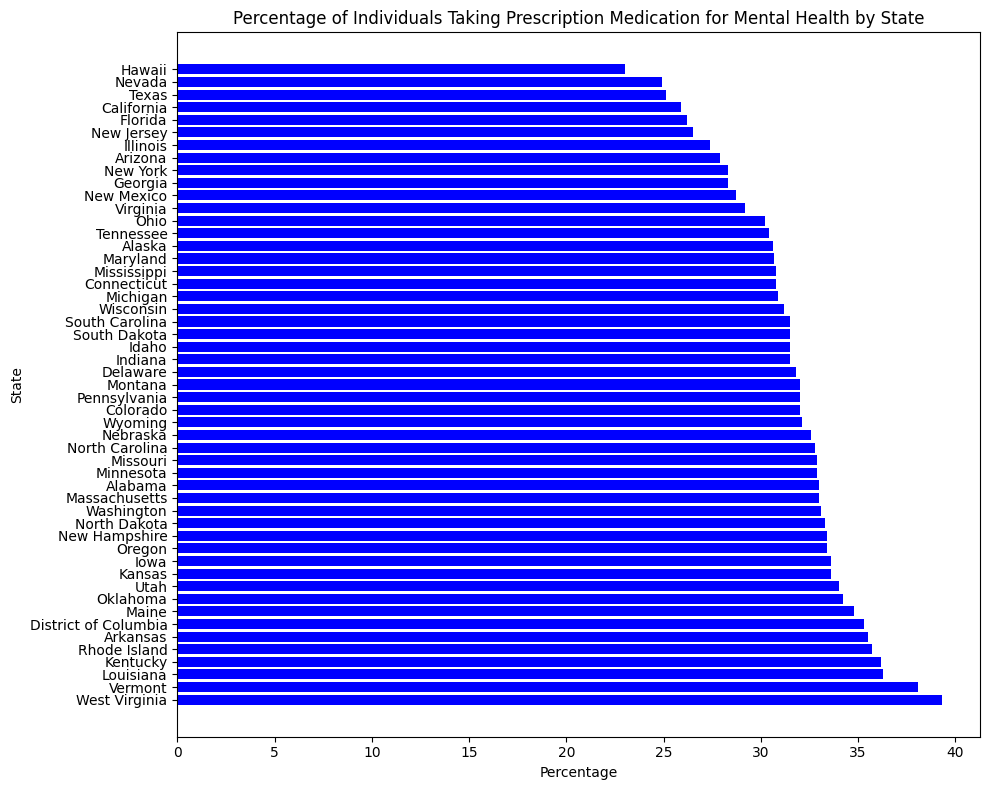

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('mental-health-care/Mental_Health_Care_in_the_Last_4_Weeks.csv')

# Filter the data to include only the necessary columns
state_df = df[df['Group'] == 'By State'][['Subgroup', 'Value']]

# Sort the data by value in descending order
state_df = state_df.sort_values(by='Value', ascending=False)

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(state_df['Subgroup'], state_df['Value'], color='blue')

plt.xlabel('Percentage')
plt.ylabel('State')
plt.title('Percentage of Individuals Taking Prescription Medication for Mental Health by State')

plt.tight_layout()
plt.show()

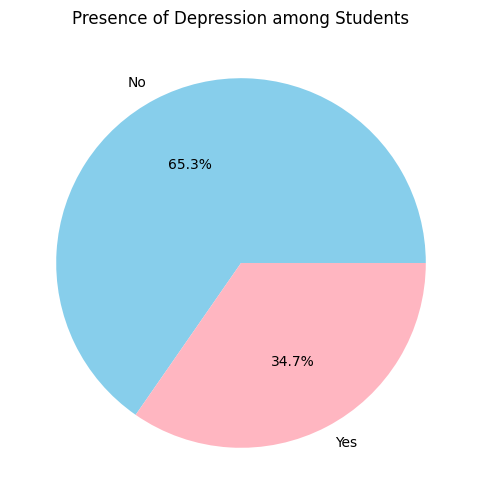

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('student-mental-health/Student Mental health.csv')

# Count the presence of depression among students
depression_counts = df['Do you have Depression?'].value_counts()
labels = ['No', 'Yes']

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(depression_counts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightpink'])

plt.title('Presence of Depression among Students')

plt.show()

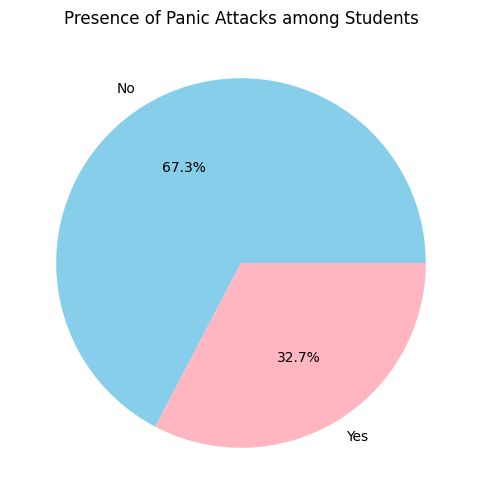

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('student-mental-health/Student Mental health.csv')

# Count the presence of panic attacks among students
panic_counts = df['Do you have Panic attack?'].value_counts()
labels = ['No', 'Yes']

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(panic_counts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightpink'])

plt.title('Presence of Panic Attacks among Students')

plt.show()

## Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->

Kaggle only.

Charts:

Percentage of Respondents Who Received Treatment by Age (In Tech):
Interesting to see the variety in when people get treatment. Should they get it sooner? 

Percentage of Individuals Taking Prescription Medication for Mental Health by Gender:
This can be intepreted a lot of different ways, but theoretically, this should be 50/50 and not so onesided. This is very important to look at!

Percentage of Individuals Taking Prescription Medication for Mental Health by State:
I think its interesting to analyze this statewide and how different it is state to state. This makes me ask a lot of whys. Why is Hawaii the least amount? Why is West Virginia the most? 

Presence of Depression among Students:
This was made to show how common depression is. While it may seem like a "low" statistic, that is 1/3 people from what I gathered here.

Presence of Panic Attacks among Students:
Done for a similar reason as above. This shows how panic attacks probably tie into depression, and again, close to 1/3.

What insights and interesting information are you able to extract at this stage?

What are the distributions of my variables?

Are there any correlations between my variables?

What issues can you see in your data at this point?

Are there any outliers or anomalies? are they relevant to your analysis? or should they be removed?

Are there any missing values? how are you going to deal with them?

Are there any duplicate values? how are you going to deal with them?

Are there any data types that need to be changed?

Missing values
Duplicate values
Anomalies and Outliers
Data types transformation.
You will need to describe the data cleaning process you went through to prepare your data for analysis. This includes your code and the reasoning behind your decisions:


In [ ]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 1271 bytes to source.py
